<a href="https://colab.research.google.com/github/sherylmatthew/PL2025-Predictor/blob/main/notebooks/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()   # select your CSVs manually


Saving eng1_2018-19.csv to eng1_2018-19.csv
Saving eng1_2019-20.csv to eng1_2019-20.csv
Saving eng1_2020-21.csv to eng1_2020-21.csv
Saving eng1_2021-22.csv to eng1_2021-22.csv
Saving eng1_2022-23.csv to eng1_2022-23.csv
Saving eng1_2023-24.csv to eng1_2023-24.csv


In [5]:
import pandas as pd
df = pd.read_csv("eng1_2018-19.csv")


In [6]:
import os
print(os.listdir("/content"))


['.config', 'eng1_2022-23.csv', 'eng1_2023-24.csv', 'eng1_2021-22.csv', 'outputs', 'eng1_2018-19.csv', 'eng1_2020-21.csv', 'eng1_2019-20.csv', 'sample_data']


In [7]:
import glob
files = glob.glob("/content/eng1_*.csv")
print(files)


['/content/eng1_2022-23.csv', '/content/eng1_2023-24.csv', '/content/eng1_2021-22.csv', '/content/eng1_2018-19.csv', '/content/eng1_2020-21.csv', '/content/eng1_2019-20.csv']


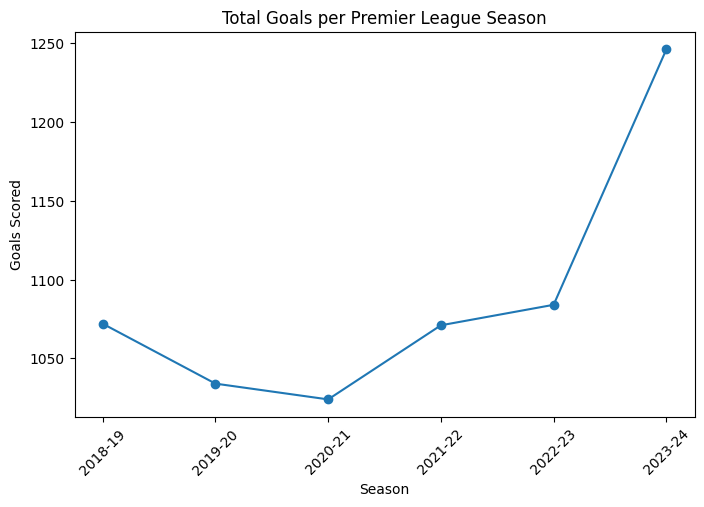

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

all_data = []

for f in files:
    season = f.split("_")[-1].replace(".csv", "")  # e.g. 2018-19
    df = pd.read_csv(f)

    # Split FT into goals
    df[["Team1_Goals", "Team2_Goals"]] = df["FT"].str.split("-", expand=True).astype(int)
    df["Season"] = season
    all_data.append(df)

data = pd.concat(all_data)

# Total goals per season
season_goals = data.groupby("Season")[["Team1_Goals", "Team2_Goals"]].sum()
season_goals["Total_Goals"] = season_goals["Team1_Goals"] + season_goals["Team2_Goals"]

# Plot
plt.figure(figsize=(8,5))
plt.plot(season_goals.index, season_goals["Total_Goals"], marker="o")
plt.title("Total Goals per Premier League Season")
plt.xlabel("Season")
plt.ylabel("Goals Scored")
plt.xticks(rotation=45)
plt.show()


In [9]:
import os
os.makedirs("outputs/plots", exist_ok=True)

plt.savefig("outputs/plots/goals_per_season.png")


<Figure size 640x480 with 0 Axes>